Task 1: Exploratory Data Analysis 1:
---

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = "/content/drive/MyDrive/Dataset/salaries.csv"

salariesData = pd.read_csv(path)

salariesDataInfo= salariesData.info()
salariesDataHead= salariesData.head()

salariesDataInfo, salariesDataHead, salariesData

print(salariesData.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB
          work_year        salary  salary_in_usd  remote_ratio
count  16494.000000  1.649400e+04   16494.000000  16494.000000
mean    2023.224991  1.637878e+05  149713.575725     32.044986
std        0.713405  3.40601

- work_year: The year of work. Data spans from 2020 to 2024, with an increasing number of entries in more recent years. This reflects either an increase in data collection efforts or an actual increase in job activity recorded in the dataset.

- experience_level: The level of experience. Several categories exist such as Junior (Entry), Mid-level, and Senior, indicating a diverse workforce. Most of the data falls under Mid-level, suggesting a significant representation of experienced professionals.

- employment_type: Type of employment (e.g., Full-time, Contract). Dominated by Full-Time positions, which is typical for structured employment settings. There are fewer Contract, Part-Time, and Freelance roles, reflecting common employment trends in many sectors.

- job_title: Title of the job (e.g., Data Scientist, Data Science Manager).

- salary: Annual salary in the job's local currency. Ranges from 20,000 to 30,400,000 showing very large variation

- salary_currency: The currency of the salary.

- salary_in_usd: Salary converted to USD. Ranges from 15,000 - 800,000. The majority of salaries are reported in USD, followed by EUR and other currencies. This diversity indicates a global dataset but with a significant bias towards US-based roles.

- employee_residence: The residence of the employee. Reflects a global workforce, with the top countries being the US, India, and the UK. This geographical distribution is consistent with tech industry demographics, where these countries are major hubs.

- remote_ratio: The percentage of work done remotely. Ranges from 0% (no remote) to 100% (fully remote)

- company_location: The location of the company. Similar to employee residence, the US dominates, followed by other tech-centric locations. This suggests that many companies are either headquartered in the US or have significant operations there

- company_size: Size of the company (e.g., Small, Medium, Large). This allows for analysis across different organizational scales and their impact on salary structures.

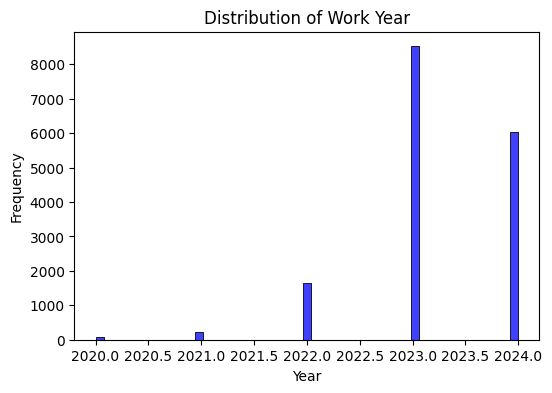

In [23]:
#Distribution of Work Year
plt.figure(figsize=(6, 4))
sns.histplot(salariesData['work_year'], kde=False, color='blue')
plt.title('Distribution of Work Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

 Data ranges from 2020 to 2024. Most entries are from recent years, indicating a modern dataset.

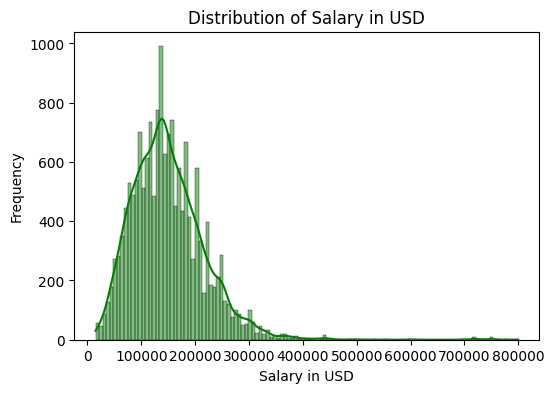

In [24]:
plt.figure(figsize=(6, 4))
sns.histplot(salariesData['salary_in_usd'], kde=True, color='green')
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

The distribution of salaries is right-skewed, suggesting that most salaries are clustered towards the lower end of the scale, with fewer high salaries.

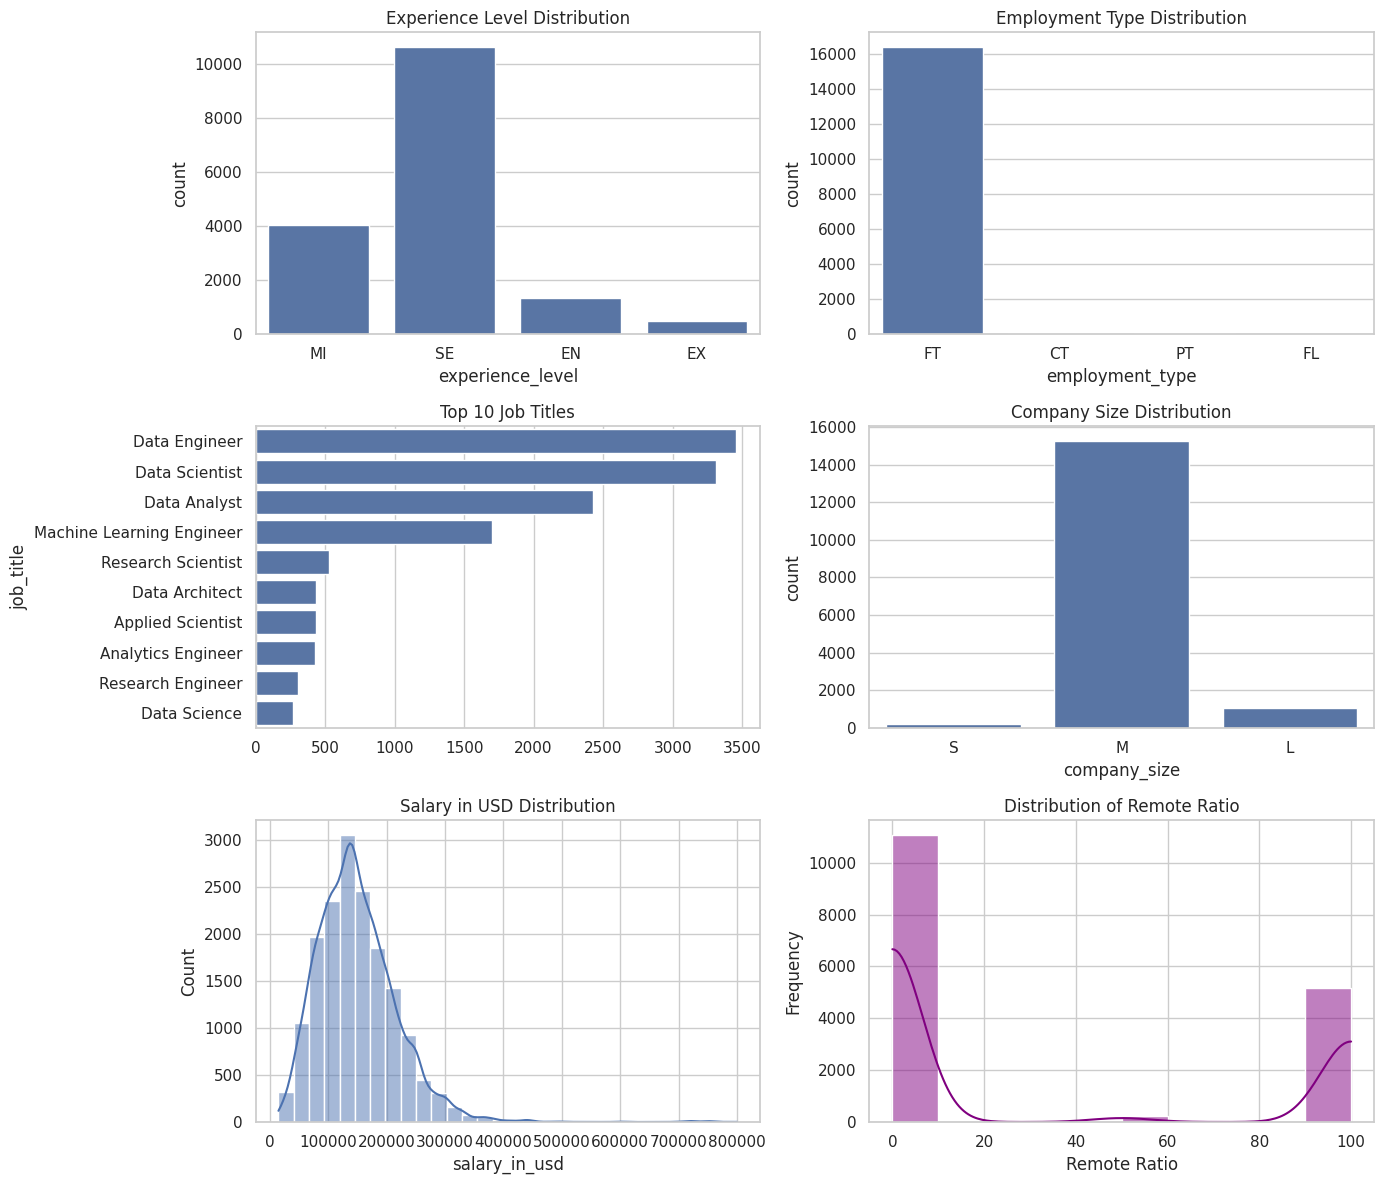

In [25]:
# Setting up the aesthetic style for plots
sns.set(style="whitegrid")

# Plotting distributions for key categorical features
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Experience Level
sns.countplot(x='experience_level', data=salariesData, ax=axes[0, 0]).set_title('Experience Level Distribution')

# Employment Type
sns.countplot(x='employment_type', data=salariesData, ax=axes[0, 1]).set_title('Employment Type Distribution')

# Job Title
job_title_counts = salariesData['job_title'].value_counts().nlargest(10)  # Display top 10 job titles only
sns.barplot(y=job_title_counts.index, x=job_title_counts.values, ax=axes[1, 0]).set_title('Top 10 Job Titles')

# Company Size
sns.countplot(x='company_size', data=salariesData, ax=axes[1, 1]).set_title('Company Size Distribution')

# Salary in USD (Histogram)
sns.histplot(salariesData['salary_in_usd'], bins=30, ax=axes[2, 0], kde=True).set_title('Salary in USD Distribution')

# Remote Ratio
sns.histplot(salariesData['remote_ratio'], bins=10, color='purple', kde=True)
plt.title('Distribution of Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

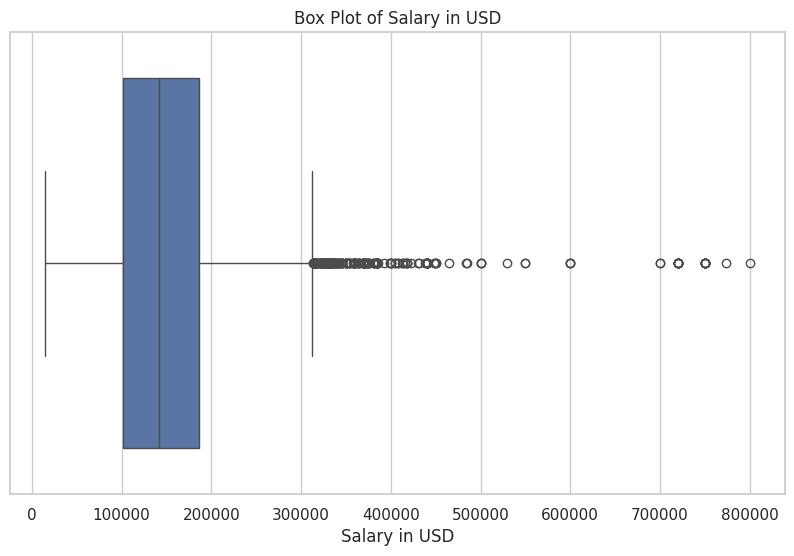

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=salariesData['salary_in_usd'])
plt.title('Box Plot of Salary in USD')
plt.xlabel('Salary in USD')
plt.show()


The Interquartile Range (IQR) method for detecting outliers in the salary_in_usd column suggests setting the lower and upper bounds at approximately -25,056(USD) & 312,474(USD), respectively. According to these bounds, about 1.72% of the salary entries are considered outliers.

**Preprocessing Steps:**

Handling Categorial Data:

 - experience_level,
 - employment_type,
 - job_title, salary_currency,
 - employee_residence,
 - company_location,  
 - company_size.

In [27]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Creating a copy of the dataframe to apply transformations
salaries_preprocessed = salariesData.copy()

# OneHotEncoder instance
encoder = OneHotEncoder(sparse=False)

# LabelEncoder instance for ordinal data if necessary
label_encoder = LabelEncoder()

# Applying one-hot encoding to nominal categorical features
nominal_features = ['employment_type', 'salary_currency', 'employee_residence', 'company_location', 'job_title']
for feature in nominal_features:
    # Transform and replace in the dataframe
    transformed = encoder.fit_transform(salaries_preprocessed[[feature]])
    transformed_df = pd.DataFrame(transformed, columns=[f"{feature}_{category}" for category in encoder.categories_[0]])
    salaries_preprocessed = pd.concat([salaries_preprocessed.drop(feature, axis=1), transformed_df], axis=1)

# Label encoding for ordinal data
ordinal_features = ['experience_level', 'company_size']
experience_order = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}  # Example mapping, adjust based on actual data description
company_size_order = {'S': 0, 'M': 1, 'L': 2}

salaries_preprocessed['experience_level'] = salaries_preprocessed['experience_level'].map(experience_order)
salaries_preprocessed['company_size'] = salaries_preprocessed['company_size'].map(company_size_order)

# Verify the transformations
salaries_preprocessed.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

,work_year,experience_level,salary,salary_in_usd,remote_ratio,company_size,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,...,job_title_Research Analyst,job_title_Research Engineer,job_title_Research Scientist,job_title_Robotics Engineer,job_title_Robotics Software Engineer,job_title_Sales Data Analyst,job_title_Software Data Engineer,job_title_Staff Data Analyst,job_title_Staff Data Scientist,job_title_Staff Machine Learning Engineer
0,2024,1,120000,120000,0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024,1,70000,70000,0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024,1,130000,130000,0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024,1,110000,110000,0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,1,240000,240000,0,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Handling Outliers in Salary Data:

In [28]:
# Outlier detection using the Interquartile Range (IQR) method for 'salary_in_usd'
Q1 = salaries_preprocessed['salary_in_usd'].quantile(0.25)
Q3 = salaries_preprocessed['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers as those beyond 1.5 times the IQR from the Q1 and Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Display the bounds and percentage of data considered as outliers
outlier_percent = ((salaries_preprocessed['salary_in_usd'] < lower_bound) | (salaries_preprocessed['salary_in_usd'] > upper_bound)).mean() * 100

lower_bound, upper_bound, outlier_percent

(-25056.25, 312473.75, 1.7218382442100155)

In [29]:
# Handling outliers by capping salaries at the upper bound to preserve more data points
salaries_preprocessed['salary_in_usd'] = salaries_preprocessed['salary_in_usd'].clip(upper=upper_bound)

# Now, scaling the numerical features: 'salary_in_usd' and 'remote_ratio'
from sklearn.preprocessing import StandardScaler

# StandardScaler instance
scaler = StandardScaler()

# Features to scale
features_to_scale = ['salary_in_usd', 'remote_ratio']

# Applying standard scaling
salaries_preprocessed[features_to_scale] = scaler.fit_transform(salaries_preprocessed[features_to_scale])

# Checking the transformed data
salaries_preprocessed[['salary_in_usd', 'remote_ratio']].head()

,salary_in_usd,remote_ratio
0,-0.451898,-0.692733
1,-1.248427,-0.692733
2,-0.292592,-0.692733
3,-0.611204,-0.692733
4,1.459772,-0.692733


Most Influential Features:
- Experience Level (0.385 correlation):
A higher correlation indicates that as the experience level increases (from junior to senior), the salary tends to be higher. This feature is one of the most significant predictors of salary.
- Salary Currency (USD, EUR, GBP correlations):
Salaries in USD have a positive correlation (0.346), suggesting higher salaries are often reported in USD. Conversely, EUR and GBP have negative correlations, indicating lower salaries relative to those reported in USD.
- Company and Employee Location (US correlation positive; GB correlation negative):
Location in the US is positively correlated with higher salaries, while locations in Great Britain show a negative correlation, reflecting potentially lower salaries or different economic conditions.
- Job Titles:
Specific job titles like 'Data Analyst' have a negative correlation with salary, suggesting these positions tend to have lower salaries compared to others captured in the dataset.

<ipython-input-30-2f4105b2572b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


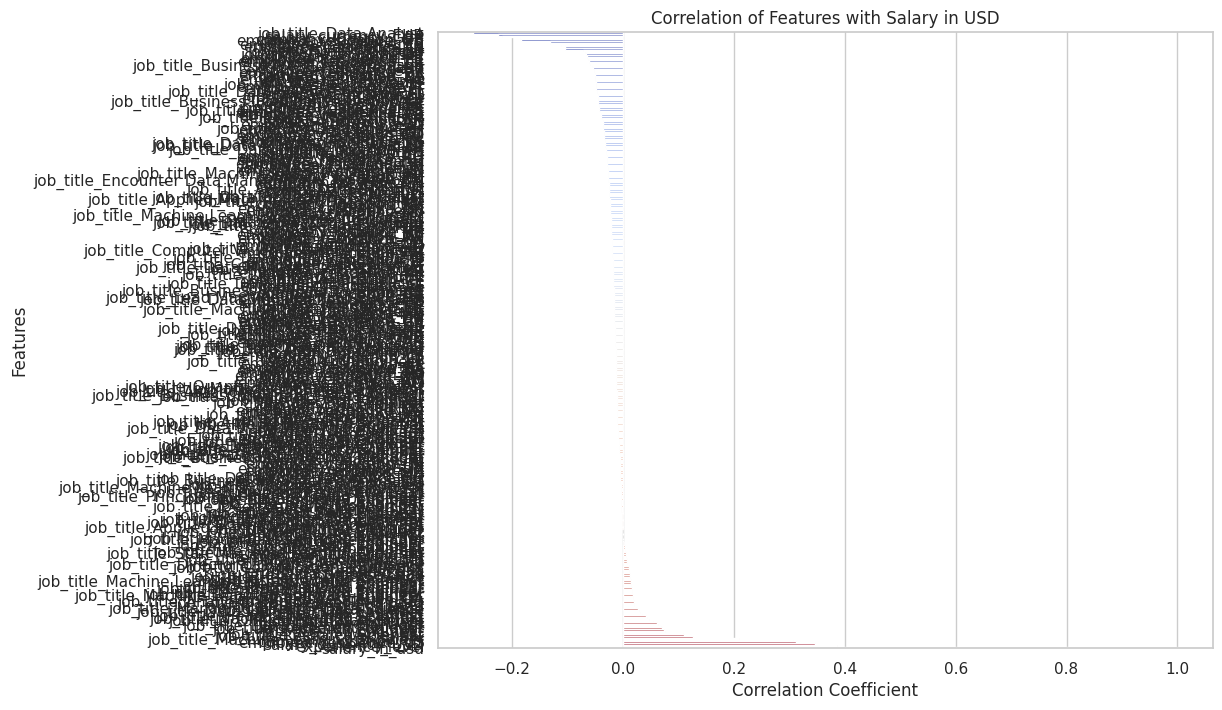

job_title_Data Analyst   -0.270862
salary_currency_EUR      -0.225393
salary_currency_GBP      -0.218996
company_location_GB      -0.186469
employee_residence_GB    -0.184420
                            ...   
company_location_US       0.305921
employee_residence_US     0.312594
salary_currency_USD       0.346123
experience_level          0.385356
salary_in_usd             1.000000
Name: salary_in_usd, Length: 353, dtype: float64

In [30]:
# Analyzing feature importance through correlation with the salary in USD (as it's a common target for prediction)
# Calculating correlations
correlations = salaries_preprocessed.corr()['salary_in_usd'].sort_values()

# Plotting correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Correlation of Features with Salary in USD')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# Displaying the correlation values for interpretation
correlations

The bar plot visualizes these correlations, highlighting the positive or negative relationships each feature has with the salary. Strong positive values indicate a direct relationship, while strong negative values suggest an inverse relationship.

With these insights, we can prioritize these features in our models to optimize prediction accuracy.

- Effective Model Training: With the data now clean, transformed, and appropriately scaled, we can train models more effectively, expecting them to learn and generalize better from the structured data.

- Accurate Predictions and Insights: Ultimately, the aim is to use these models to make accurate predictions (e.g., about salaries) or to uncover patterns (e.g., through clustering), which can inform business decisions or provide academic insights.

Task 2: Train Models
---

Variables being used in these two models:

- work_year (Numerical): Directly used as a feature.
- experience_level (Categorical): Encoded into numeric values.
- remote_ratio (Numerical): Directly used as a feature.
- company_size (Categorical): Encoded into numeric values.



In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Prepare the dataset for regression
features = salaries_preprocessed[['work_year', 'experience_level', 'remote_ratio', 'company_size']]
target = salaries_preprocessed['salary_in_usd']

# Encode categorical variables
label_encoders = {}
for column in ['experience_level', 'company_size']:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column])
    label_encoders[column] = le

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Train a linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = reg_model.predict(X_test)
regression_mse = mean_squared_error(y_test, y_pred)
regression_mse

<ipython-input-41-2e81b31c304f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = le.fit_transform(features[column])
<ipython-input-41-2e81b31c304f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = le.fit_transform(features[column])


0.8513201411375685

In [42]:
# Create binary target for classification (1 if salary is above median, 0 otherwise)
median_salary = salaries_preprocessed['salary_in_usd'].median()
binary_target = (salaries_preprocessed['salary_in_usd'] > median_salary).astype(int)

# Split the data for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(features_scaled, binary_target, test_size=0.2, random_state=42)

# Train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_class, y_train_class)

# Predict and evaluate
y_pred_class = logistic_model.predict(X_test_class)
classification_accuracy = accuracy_score(y_test_class, y_pred_class)
classification_accuracy


0.6489845407699303

Linear Regression:
- An R-squared value of 0.8513 is quite high, suggesting that about 85.13% of the variability in your target variable (salary) can be explained by the features used in the model. This indicates a strong model that performs well in terms of explaining the data.

Logisitic Regression:
- An accuracy of 64.89% is moderate. It suggests that the model correctly predicts whether a salary is above or below the median 64.89% of the time. This level of accuracy is decent, especially if the classes are balanced, but there may be room for improvement, possibly by tuning the model, using different features, or trying different classification algorithms.

In [40]:



# Check if 'salaries_preprocessed' is defined
if 'salaries_preprocessed' not in locals():
    # Redefining the preprocessing steps assuming the original dataframe is named `salaries_data`
    # As I need to execute the entire preprocessing steps described earlier to create 'salaries_preprocessed'

    # One-hot encoding
    encoder = OneHotEncoder(sparse=False)
    nominal_features = ['employment_type', 'salary_currency', 'employee_residence', 'company_location', 'job_title']
    for feature in nominal_features:
        transformed = encoder.fit_transform(salaries_data[[feature]])
        transformed_df = pd.DataFrame(transformed, columns=[f"{feature}_{category}" for category in encoder.categories_[0]])
        salaries_data = pd.concat([salaries_data.drop(feature, axis=1), transformed_df], axis=1)

    # Label encoding for ordinal data
    experience_order = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
    company_size_order = {'S': 0, 'M': 1, 'L': 2}
    salaries_data['experience_level'] = salaries_data['experience_level'].map(experience_order)
    salaries_data['company_size'] = salaries_data['company_size'].map(company_size_order)

    # Outliers
    Q1 = salaries_data['salary_in_usd'].quantile(0.25)
    Q3 = salaries_data['salary_in_usd'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    salaries_data['salary_in_usd'] = salaries_data['salary_in_usd'].clip(upper=upper_bound)

    # Scaling
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    features_to_scale = ['salary_in_usd', 'remote_ratio']
    salaries_data[features_to_scale] = scaler.fit_transform(salaries_data[features_to_scale])

    salaries_preprocessed = salaries_data

# Selecting features
features = ['remote_ratio', 'employment_type_FT', 'salary_in_usd']  # 'employment_type_FT' as an example of a one-hot encoded feature
X = salaries_preprocessed[features[:-1]]  # all features except salary_in_usd
y = salaries_preprocessed['salary_in_usd']  # target feature

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train Decision Tree Regressor model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predictions and evaluating both models
lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

# Calculating RMSE for both models
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))

(lr_rmse, dt_rmse)

(1.0056208235375486, 0.9984854802516253)

Task 3:
---

Both models provide useful insights into our dataset with a slight edge for the decision tree in handling any non-linear aspects within the confines of the current feature set. The close performance also suggests that additional features or more complex modeling techniques may be required to substantially improve prediction accuracy.



Results are above


Task 4
---

RMSE: 1.0056

Linear Regression:
(Strengths)

- Simplicity and Interpretability: Linear regression models are straightforward and easy to interpret. The relationship between the input variables and the target is represented as a linear combination of the input features.
- Efficiency: These models are computationally efficient to train and require less data to achieve meaningful results, making them suitable for smaller datasets or scenarios where interpretability is crucial.

Linear Regression
(Weakness)

- Assumption of Linearity: Linear regression assumes a linear relationship between the input features and the target variable. If the actual relationship is non-linear, this model can underperform.
- Sensitivity to Outliers: Linear models are sensitive to outliers. Outliers can significantly affect the slope of the regression line, leading to a model that does not represent the majority of the data well.


In the context of our data, the linear regression's performance (RMSE = 1.0056) suggests that it managed to capture the general trend in the data adequately. However, if there are outliers or non-linear relationships that weren't effectively handled in preprocessing, these could have limited its performance.

RMSE: 0.9985

Decision Tree:
(Strengths)

- Handling Non-Linearity: Decision trees do not assume any linearity in the data. They can model complex patterns through a hierarchical structure of decisions, which makes them more flexible in capturing non-linear relationships.
- Robustness to Outliers: Decision trees are generally more robust to outliers. Since they split data at certain points, outliers have less influence compared to linear regression, where outliers can significantly skew the regression line.

Decision Tree:
(Weakness)

- Tendency to Overfit: Without proper tuning, decision trees can easily overfit the training data, especially if they are allowed to grow deep. This results in high variance in predictions.
- Less Interpretable in Complex Forms: While simple decision trees are easy to understand, more complex trees can become very hard to interpret and visualize.

 the decision tree's slightly better performance (RMSE = 0.9985) indicates it might have effectively managed some of the dataset complexities that linear regression could not. The minimal difference in RMSE between the two models suggests that while there are possibly some non-linear relationships, they are not profoundly impacting the overall prediction capability, or both models have been constrained enough not to overfit.

Futher Analysis:

- Outlier Influence: If preprocessing did not entirely mitigate the impact of outliers, the decision tree's robustness here might have provided it a slight edge.
- Feature Relationships: The relatively good performance of linear regression suggests that key predictive features have a linear relationship with the salary. However, subtle non-linear relationships better captured by the decision tree might exist.

Conclusion:

Both models offer valuable insights and have their place depending on the specific requirements of analysis:

- Use linear regression when you need a quick, easily interpretable model and are certain of linear relationships in the data.
- Opt for decision trees when dealing with complex data structures, non-linear relationships, or significant outliers, provided that measures are taken to prevent overfitting.


To further improve model performance and gain deeper insights, consider:

- Feature Engineering: Creating new features or transforming existing ones to better capture the underlying relationships.
- Model Tuning: Employ techniques like grid search or cross-validation to optimize model parameters.
- Ensemble Methods: Combining multiple models to balance their individual weaknesses, such as using Random Forest or Gradient Boosting, which can handle outliers and model complexity more effectively without as much risk of overfitting as a single decision tree.